In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data_banknote_authentication.txt", header=None)

In [ ]:
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
features=['variance','skewness','curtosis','entropy']

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
df.shape

(1372, 5)

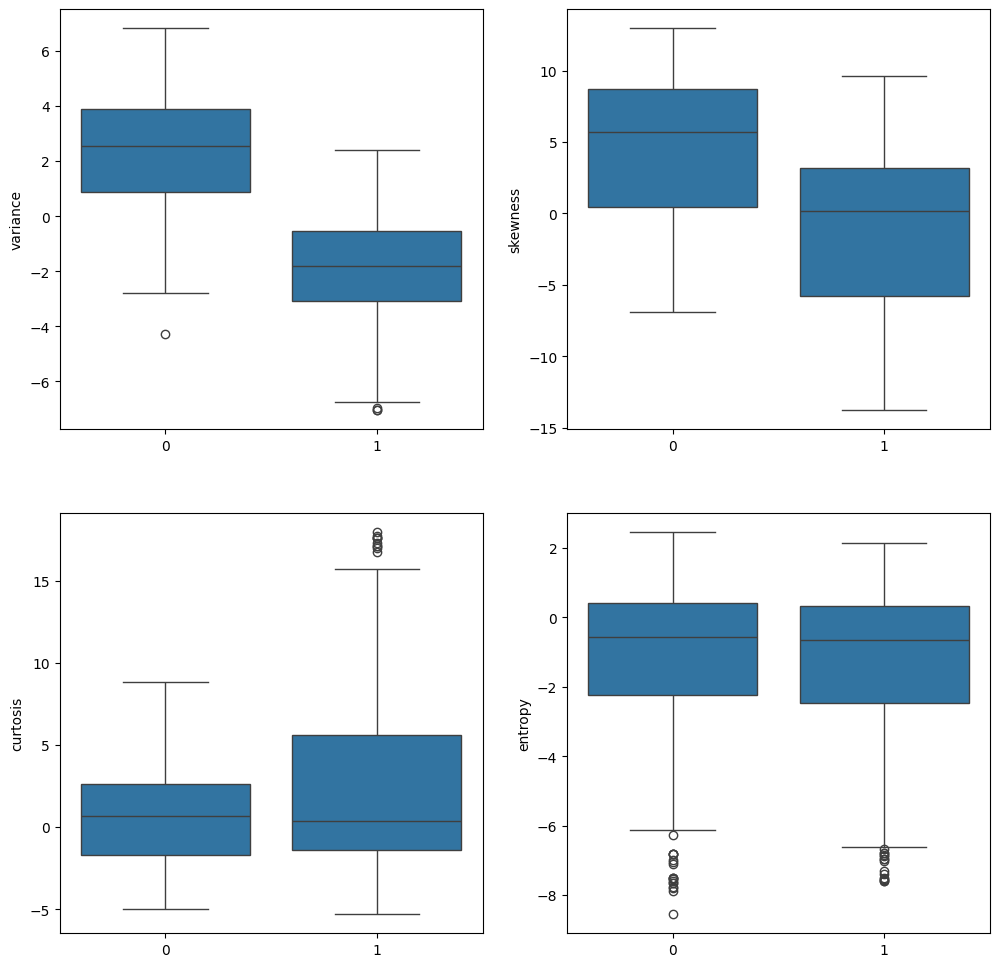

In [ ]:
plt.figure(figsize=(12,12))
for i in range(1,5):
  plt.subplot(2,2,i)
  sns.boxplot(y=X[:,i-1],x=y)
  plt.ylabel(features[i-1])

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

In [ ]:
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.fit_transform(X_test)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(dim=1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(dim=1)

/tmp/ipython-input-1259786891.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)


In [ ]:
X_train.shape,y_train.shape

(torch.Size([1166, 4]), torch.Size([1166, 1]))

In [ ]:
training=TensorDataset(X_train,y_train)
testing=TensorDataset(X_test,y_test)

In [ ]:
training=DataLoader(training,batch_size=28,shuffle=True)
testing=DataLoader(testing,batch_size=28)

In [ ]:
import torch
from torch import nn

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer=nn.Sequential(nn.Linear(4,8),
        nn.ReLU(),
        nn.Linear(8,16),
        nn.ReLU(),
        nn.Linear(16,1)
    )
  def forward(self,x):
    return self.layer(x)

In [ ]:
model=Model()
model

Model(
  (layer): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [ ]:
lossf=nn.BCELoss()
optim=torch.optim.SGD(params=model.parameters(),lr=0.1,momentum=0.9)

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(69)
epochs=30
for epoch in tqdm(range(epochs)):
    model.train()
    train_loss=0
    for i,(X,y) in enumerate(training):
      logit=model(X)
      pred=torch.sigmoid(logit)
      loss=lossf(pred,y)

      optim.zero_grad()
      loss.backward()
      optim.step()
      train_loss += loss.item()
      if i%100==0:
        print(f"Ananlysed {i} batches")
    train_loss /= len(training)
    model.eval()
    test_loss=0
    with torch.inference_mode():
      for X,y in testing:
        test_logit=model(X)
        test_pred=torch.sigmoid(test_logit)
        loss=lossf(test_pred,y)
        test_loss+=loss.item()
      test_loss /= len(testing)

    if epoch % 2 == 0:
        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")


  0%|          | 0/30 [00:00<?, ?it/s]

Ananlysed 0 batches
Epoch 00 | Train Loss: 0.4483 | Test Loss: 0.0398
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 02 | Train Loss: 0.0224 | Test Loss: 0.0031
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 04 | Train Loss: 0.0022 | Test Loss: 0.0008
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 06 | Train Loss: 0.0010 | Test Loss: 0.0003
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 08 | Train Loss: 0.0007 | Test Loss: 0.0002
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 10 | Train Loss: 0.0006 | Test Loss: 0.0002
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 12 | Train Loss: 0.0004 | Test Loss: 0.0001
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 14 | Train Loss: 0.0004 | Test Loss: 0.0001
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 16 | Train Loss: 0.0003 | Test Loss: 0.0001
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 18 | Train Loss: 0.0003 | Test Loss: 0.0001
Ananlysed 0 batches
Ananlysed 0 batches
Epoch 20 | Train Loss: 0.0002 | Test Loss: 0.0001
Ananlysed 0 batches
Ananlysed 

In [ ]:
from sklearn.metrics import r2_score

model.eval()
with torch.no_grad():
    y_logit = model(X_test)
    y_pred=torch.sigmoid(y_logit)
    r2 = r2_score(y_test.numpy(), y_pred.numpy())
    print(f"R² score on test set: {r2:.4f}")

R² score on test set: 1.0000
